In [21]:
import collections
import os
import subprocess
import math
from decimal import *
import re
import sys
import matplotlib.pyplot as plt
import numpy as np  # standard numeric lib
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
import operator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [22]:
# dataFile1 intended to be ACES2 CCSDT data, dataFile2 intended to be ORCA file
# returns the FC values from the relevant files, harvested using the bash scripts
def get_FCvalues(dataFile1, dataFile2): # can use this to interate over the appropriate directories
    dataFile1_FCinfo=[]
    dataFile2_FCinfo=[]


    with open(dataFile1, 'r') as filehandle:
        fileContent=filehandle.readlines()
        for line in fileContent:
            #print(line, len(line))
            if len(line)!=1: #gets rid of the spacing between molecules in FC datafile
                line=line.split()
                #print(float(line[1]))
                dataFile1_FCinfo.append(abs(float(line[1])))
                

    with open(dataFile2, 'r') as filehandle:
        fileContent=filehandle.readlines()
        for line in fileContent:
            #print(line, len(line))
            if len(line)!=1: #gets rid of the spacing between molecules in FC datafile
                line=line.split()
                #print(float(line[1]))
                dataFile2_FCinfo.append(abs(float(line[1])))
            
    return dataFile1_FCinfo,dataFile2_FCinfo


In [23]:
# GGAs
CCSDT_FC, blyp_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_blypFC.txt')
CCSDT_FC, mPWLYPFC_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_mPWLYPFC.txt')
CCSDT_FC, olyp_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_olypFC.txt')
CCSDT_FC, pbe_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_pbeFC.txt')
CCSDT_FC, pw91_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_pw91FC.txt')
CCSDT_FC, xlyp_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_xlypFC.txt')

# HYBs
CCSDT_FC, b3lyp_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_b3lypFC.txt')
CCSDT_FC, bhandhlyp_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_bhandhlypFC.txt')
CCSDT_FC, o3lyp_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_o3lypFC.txt')
CCSDT_FC, pbe0_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_pbe0FC.txt')
CCSDT_FC, pw1pw_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_pw1pwFC.txt')
CCSDT_FC, pw6b95_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_pw6b95FC.txt')
CCSDT_FC, qtp17_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_qtp17FC.txt')

#META HYBs
CCSDT_FC, m062x_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_mo62xFC.txt')
CCSDT_FC, m06l_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_m061FC.txt')
CCSDT_FC, tpss0_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_tpss0FC.txt')
CCSDT_FC, tpss_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_tpssFC.txt')
CCSDT_FC, tpssh_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_tpsshFC.txt')
CCSDT_FC, b97mv_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_b97mvFC.txt')
CCSDT_FC, scan_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_scanFC.txt')

# RSHs
CCSDT_FC, lcblyp_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_lcblypFC.txt')
CCSDT_FC, camb3lyp_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_camb3lypFC.txt')
CCSDT_FC, qtp00_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_qtp00FC.txt')
CCSDT_FC, qtp01_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_qtp01FC.txt')
CCSDT_FC, qtp02_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_qtp02FC.txt')
CCSDT_FC, wb97x_FC=get_FCvalues('correct_exp_Ref_data.txt','correct_final_wb97xFC.txt')

print(len(CCSDT_FC), len(blyp_FC))
print(blyp_FC)

(53, 53)
[1057.4562, 6.104, 298.3432, 259.2519, 199.13, 192.9107, 44.0908, 50.6738, 1525.1857, 31.1568, 87.9016, 37.7711, 62.4528, 39.6472, 361.0694, 46.8698, 271.5922, 4.0317, 5.1487, 80.3124, 35.6123, 227.8212, 1056.4142, 59.7852, 388.6186, 384.1381, 28.8798, 141.0092, 22.0672, 53.2869, 66.7636, 56.7538, 25.5195, 75.0399, 59.6302, 389.644, 195.4063, 80.2653, 59.7093, 246.3437, 19.421, 36.2139, 70.3427, 1011.0986, 17.8858, 5.8802, 307.8365, 189.0261, 116.9428, 63.0781, 51.6752, 7.57, 54.0935]


In [24]:
# Mean absolute deviation
def meanABSdeviation(arr):
    avg=np.average(arr)
    summedDiff=0.0
    for i in range(len(arr)):
        diff=abs(arr[i] - avg)
        summedDiff=summedDiff+diff
        
    return summedDiff/len(arr)

def meanDeviation(expFC, calculatedFC):
    md=0.0
    for i in range(len(expFC)):
        md=md+(expFC[i]-calculatedFC[i])
        
    return md/len(expFC)


# Mean deviation from exp/ccsdt values
def meanDeviationCCSDT(arr,ccsdtarr):
    summed=0.0
    for i in range(len(arr)):
        diff=arr[i]-ccsdtarr[i]
        summed=summed+diff
    return summed/len(arr)

def meanAbsDeviationCCSDT(arr,ccsdtarr):
    summed=0.0
    for i in range(len(arr)):
        diff=abs(arr[i]-ccsdtarr[i])
        summed=summed+diff
    return summed/len(arr)

def variance(arr, ccsdtarr):
    summed=0.0
    Avg=np.average(ccsdtarr)
    for i in range(len(arr)):
        #print(arr[i],ccsdtarr[i])
        diff=(arr[i]-ccsdtarr[i])**2
        summed=summed+diff
    
    #print('varaince summed: ', summed)
    return summed/len(arr)

def stdDev(variance):
    return (variance)**(0.5000)
    

def medianABSerror(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))

def plot(expFC, calculatedFC,title):
    x11=np.linspace(1,2000,2000)
    slope, intercept, r_value, p_value, std_err = stats.linregress(expFC, calculatedFC)
    
    
    #plt.plot(x11,intercept+slope*x11,label='$R^2$='+str(r_value))
    print()
    print('-------------------------------')
    print("         RESULTS OF    ", title, '   FC RESULTS       ')
    print('-------------------------------')
#    print("Mean Absolute Deviation of DFT Calculated FC: ", meanABSdeviation(calculatedFC))
#    print("Mean Absolute Deviation of CCSD(T) Calculated FC: ", meanABSdeviation(expFC))
#    print('\n') meanDeviation
    print("Mean Deviation w.r.t Experiment: ", meanDeviationCCSDT(expFC,calculatedFC))
    print("Mean Deviation w.r.t Experiment: ", meanDeviation(calculatedFC,expFC))
    print("Mean Absolute Deviation w.r.t Experiment: ", meanAbsDeviationCCSDT(calculatedFC,expFC))
#    print('\n')
#    print("Variance w.r.t CCSD(T): ", variance(calculatedFC,expFC))
#    print("Standard Deviation w.r.t CCSD(T): ", stdDev(variance(calculatedFC,expFC)))
#    print('\n')
    rms = sqrt(mean_squared_error(expFC, calculatedFC))
    print("Root Mean Square Deviation (RMSD/RMSE std. dev.) value is: ", rms)
    print("R squared value is: ",r_value)
    print("Slope and intercept of linear function: ", slope, intercept)


    print('************************************************************')
    return rms, meanDeviationCCSDT(calculatedFC,expFC),meanAbsDeviationCCSDT(calculatedFC,expFC)
    #print('\n')
    #plt.plot(expFC,calculatedFC,'ro')#,label='Raw data-RMS:'+str(rms))
    #plt.xlim(-10,2500)
    #plt.ylim(-10,2500)
    #plt.xlabel("Exp. FC (MHz)")
    #plt.ylabel("Calculated FC (MHz)")
    #plt.title(title)
    #plt.legend()
    #plt.savefig('/Users/zacharywindom/Desktop/work/spring19/research/fermi_contact/runs/run/testDir/'+title+'.eps', format='eps', dpi=1000)
    #plt.show()
    #plt.savefig('/Users/zacharywindom/Desktop/work/spring19/research/fermi_contact/runs/run/testDir/'+title+'.eps', format='eps', dpi=1000)



In [25]:
# GGAs
rms_blyp, md_blyp, mad_blyp=plot(CCSDT_FC, blyp_FC, "BLYP")
rms_mpwlyp,md_mpwlyp, mad_mpwlyp=plot(CCSDT_FC, mPWLYPFC_FC, "mPWLYP")
rms_olyp, md_olyp, mad_olyp=plot(CCSDT_FC, olyp_FC, "OLYP")
rms_pbe, md_pbe, mad_pbe=plot(CCSDT_FC, pbe_FC, "PBE")
rms_pw91, md_pw91, mad_pw91=plot(CCSDT_FC, pw91_FC, "PW91")
rms_xlyp, md_xlyp, mad_xlyp=plot(CCSDT_FC, xlyp_FC, "XLYP")

#HYBs
rms_b3lyp, md_b3lyp, mad_b3lyp=plot(CCSDT_FC, b3lyp_FC, "B3LYP")
rms_bhandhblyp, md_bhandhlyp, mad_bhandhlyp=plot(CCSDT_FC, bhandhlyp_FC, "BHANDHLYP")
rms_o3lyp, md_o3lyp, mad_o3lyp=plot(CCSDT_FC, o3lyp_FC, "O3LYP")
rms_pbe0, md_pbe0, mad_pbe0=plot(CCSDT_FC, pbe0_FC, "PBE0")
rms_pw1pw, md_pw1pw, mad_pw1pw=plot(CCSDT_FC, pw1pw_FC, "PW1PW")
rms_pw6b95, md_pw6b95, mad_pw6b95=plot(CCSDT_FC, pw6b95_FC, "PW6B95")
rms_qtp17, md_qtp17, mad_qtp17=plot(CCSDT_FC, qtp17_FC, "QTP17")

#META HYBs
#plot(CCSDT_FC, m062x_FC, "M06-2X")
#plot(CCSDT_FC, m06l_FC, "M06-L")
rms_tpss0, md_tpss0, mad_tpss0=plot(CCSDT_FC, tpss0_FC, "TPSS0")
rms_tpss, md_tpss, mad_tpss=plot(CCSDT_FC, tpss_FC, "TPSS")
rms_tpssh, md_tpssh, mad_tpssh=plot(CCSDT_FC, tpssh_FC, "TPSSh")
rms_b97mv, md_b97mv, mad_b97mv=plot(CCSDT_FC, b97mv_FC, "b97mv")
rms_scan, md_scan, mad_scan=plot(CCSDT_FC, scan_FC, "SCAN")

#RSHs
rms_lcblyp, md_lcblyp, mad_lcblyp=plot(CCSDT_FC, lcblyp_FC, "LC-BLYP")
rms_camb3lyp, md_camb3lyp, mad_camb3lyp=plot(CCSDT_FC, camb3lyp_FC, "CAM-B3LYP")
rms_qtp00,md_qtp00, mad_qtp00=plot(CCSDT_FC, qtp00_FC, "QTP00")
rms_qtp01, md_qtp01, mad_qtp01=plot(CCSDT_FC, qtp01_FC, "QTP01")
rms_qtp02, md_qtp02, mad_qtp02=plot(CCSDT_FC, qtp02_FC, "QTP02")
rms_wb97x, md_wb97x, mad_wb97x=plot(CCSDT_FC, wb97x_FC, "wB97x")

()
-------------------------------
('         RESULTS OF    ', 'BLYP', '   FC RESULTS       ')
-------------------------------
('Mean Deviation w.r.t Experiment: ', 4.0495716981132075)
('Mean Deviation w.r.t Experiment: ', -4.0495716981132075)
('Mean Absolute Deviation w.r.t Experiment: ', 17.185273584905662)
('Root Mean Square Deviation (RMSD/RMSE std. dev.) value is: ', 28.94907441337515)
('R squared value is: ', 0.9959582979112889)
('Slope and intercept of linear function: ', 0.9714262397242693, 1.6002154869721323)
************************************************************
()
-------------------------------
('         RESULTS OF    ', 'mPWLYP', '   FC RESULTS       ')
-------------------------------
('Mean Deviation w.r.t Experiment: ', 4.096958490566039)
('Mean Deviation w.r.t Experiment: ', -4.096958490566039)
('Mean Absolute Deviation w.r.t Experiment: ', 17.624264150943397)
('Root Mean Square Deviation (RMSD/RMSE std. dev.) value is: ', 29.839455770367156)
('R squared value is

In [26]:
# 
print(md_wb97x)

4.02597735849


In [27]:
avgRMS=(rms_xlyp+rms_pw91+rms_pbe+rms_olyp+rms_mpwlyp+rms_blyp)/6
avgMD=(md_xlyp+md_pw91+md_pbe+md_olyp+md_mpwlyp+md_blyp)/6
avgMAD=(mad_xlyp+mad_pw91+mad_pbe+mad_olyp+mad_mpwlyp+mad_blyp)/6
print('avg RMS: ', avgRMS, 'avg MD: ', avgMD, 'avg MAD: ', avgMAD)

('avg RMS: ', 29.70046076478081, 'avg MD: ', -5.460490251572328, 'avg MAD: ', 17.016238050314467)


In [28]:
meanErrorDict={}
meanErrorDict={'BLYP':[md_blyp,abs(md_blyp),'orange'], 'mPWLYP':[md_mpwlyp,abs(md_mpwlyp),'orange'], 'OLYP' : [md_olyp,abs(md_olyp),'orange'], 'PBE':[md_pbe,abs(md_pbe),'orange'],'PW91':[md_pw91,abs(md_pw91),'orange'],'XLYP':[md_xlyp,abs(md_xlyp),'orange'],  
              'B3LYP':[md_b3lyp,abs(md_b3lyp),'lime'], 'BHANDHLYP':[md_bhandhlyp,abs(md_bhandhlyp),'lime'],'O3LYP':[md_o3lyp,abs(md_o3lyp),'lime'],'PBE0':[md_pbe0,abs(md_pbe0),'lime'],'PW1PW':[md_pw1pw,abs(md_pw1pw),'lime'],'PW6B95':[md_pw6b95,abs(md_pw6b95),'lime'],'QTP17':[md_qtp17,abs(md_qtp17),'lime'],
              'TPSS0':[md_tpss0,abs(md_tpss0),'navy'],'TPSS':[md_tpss,abs(md_tpss),'navy'],'TPSSh':[md_tpssh,abs(md_tpssh),'navy'],'B97mv':[md_b97mv,abs(md_b97mv),'navy'],'SCAN':[md_scan,abs(md_scan),'navy'],
              'LC-BLYP':[md_lcblyp,abs(md_lcblyp),'maroon'],'CAM-B3LYP':[md_camb3lyp,abs(md_camb3lyp),'maroon'],'CAM-QTP00':[md_qtp00,abs(md_qtp00),'maroon'],'CAM-QTP01':[md_qtp01,abs(md_qtp01),'maroon'],'CAM-QTP02':[md_qtp02,abs(md_qtp02),'maroon'],'wB97x':[md_wb97x,abs(md_wb97x),'maroon']}

In [29]:
meanErrorDict

{'B3LYP': [2.833052830188677, 2.833052830188677, 'lime'],
 'B97mv': [13.761743396226418, 13.761743396226418, 'navy'],
 'BHANDHLYP': [17.361835849056604, 17.361835849056604, 'lime'],
 'BLYP': [-4.0495716981132075, 4.0495716981132075, 'orange'],
 'CAM-B3LYP': [0.7092075471698134, 0.7092075471698134, 'maroon'],
 'CAM-QTP00': [15.463160377358491, 15.463160377358491, 'maroon'],
 'CAM-QTP01': [-0.1942169811320747, 0.1942169811320747, 'maroon'],
 'CAM-QTP02': [2.8273377358490537, 2.8273377358490537, 'maroon'],
 'LC-BLYP': [-10.675826415094344, 10.675826415094344, 'maroon'],
 'O3LYP': [1.6373415094339563, 1.6373415094339563, 'lime'],
 'OLYP': [5.825471698113209, 5.825471698113209, 'orange'],
 'PBE': [-13.898881132075477, 13.898881132075477, 'orange'],
 'PBE0': [-3.5169867924528306, 3.5169867924528306, 'lime'],
 'PW1PW': [-3.0846773584905653, 3.0846773584905653, 'lime'],
 'PW6B95': [2.730171698113207, 2.730171698113207, 'lime'],
 'PW91': [-13.668335849056605, 13.668335849056605, 'orange'],
 'QT

In [30]:
for k in sorted(meanErrorDict, key=operator.itemgetter(1)):
    print(k, meanErrorDict[k])

('O3LYP', [1.6373415094339563, 1.6373415094339563, 'lime'])
('B3LYP', [2.833052830188677, 2.833052830188677, 'lime'])
('B97mv', [13.761743396226418, 13.761743396226418, 'navy'])
('CAM-B3LYP', [0.7092075471698134, 0.7092075471698134, 'maroon'])
('CAM-QTP02', [2.8273377358490537, 2.8273377358490537, 'maroon'])
('CAM-QTP00', [15.463160377358491, 15.463160377358491, 'maroon'])
('CAM-QTP01', [-0.1942169811320747, 0.1942169811320747, 'maroon'])
('PBE0', [-3.5169867924528306, 3.5169867924528306, 'lime'])
('wB97x', [4.025977358490562, 4.025977358490562, 'maroon'])
('PBE', [-13.898881132075477, 13.898881132075477, 'orange'])
('SCAN', [-6.0387716981132105, 6.0387716981132105, 'navy'])
('LC-BLYP', [-10.675826415094344, 10.675826415094344, 'maroon'])
('BHANDHLYP', [17.361835849056604, 17.361835849056604, 'lime'])
('XLYP', [-2.8746660377358526, 2.8746660377358526, 'orange'])
('BLYP', [-4.0495716981132075, 4.0495716981132075, 'orange'])
('OLYP', [5.825471698113209, 5.825471698113209, 'orange'])
('TP

In [31]:
#https://www.geeksforgeeks.org/python-get-key-from-value-in-dictionary/
def get_key(val,my_dict): 
    for key, value in my_dict.items(): 
        if val == value: 
            return key 
        
        
colors=[]
signedError=[]
orderedXC=[]
for k in sorted(meanErrorDict.values(), key=operator.itemgetter(1)): #sort based on absolute Mean Error
    print(k,get_key(k,meanErrorDict),k[2])
    colors.append(k[2])
    signedError.append(k[0])
    orderedXC.append(get_key(k,meanErrorDict))

([-0.1942169811320747, 0.1942169811320747, 'maroon'], 'CAM-QTP01', 'maroon')
([0.7092075471698134, 0.7092075471698134, 'maroon'], 'CAM-B3LYP', 'maroon')
([1.6373415094339563, 1.6373415094339563, 'lime'], 'O3LYP', 'lime')
([-1.6685962264150958, 1.6685962264150958, 'navy'], 'TPSS', 'navy')
([1.6788603773584905, 1.6788603773584905, 'navy'], 'TPSSh', 'navy')
([2.730171698113207, 2.730171698113207, 'lime'], 'PW6B95', 'lime')
([2.8273377358490537, 2.8273377358490537, 'maroon'], 'CAM-QTP02', 'maroon')
([2.833052830188677, 2.833052830188677, 'lime'], 'B3LYP', 'lime')
([-2.8746660377358526, 2.8746660377358526, 'orange'], 'XLYP', 'orange')
([-3.0846773584905653, 3.0846773584905653, 'lime'], 'PW1PW', 'lime')
([-3.5169867924528306, 3.5169867924528306, 'lime'], 'PBE0', 'lime')
([4.025977358490562, 4.025977358490562, 'maroon'], 'wB97x', 'maroon')
([-4.0495716981132075, 4.0495716981132075, 'orange'], 'BLYP', 'orange')
([-4.096958490566039, 4.096958490566039, 'orange'], 'mPWLYP', 'orange')
([5.8254716

In [32]:
sorted(meanErrorDict.values(), key=operator.itemgetter(1))

[[-0.1942169811320747, 0.1942169811320747, 'maroon'],
 [0.7092075471698134, 0.7092075471698134, 'maroon'],
 [1.6373415094339563, 1.6373415094339563, 'lime'],
 [-1.6685962264150958, 1.6685962264150958, 'navy'],
 [1.6788603773584905, 1.6788603773584905, 'navy'],
 [2.730171698113207, 2.730171698113207, 'lime'],
 [2.8273377358490537, 2.8273377358490537, 'maroon'],
 [2.833052830188677, 2.833052830188677, 'lime'],
 [-2.8746660377358526, 2.8746660377358526, 'orange'],
 [-3.0846773584905653, 3.0846773584905653, 'lime'],
 [-3.5169867924528306, 3.5169867924528306, 'lime'],
 [4.025977358490562, 4.025977358490562, 'maroon'],
 [-4.0495716981132075, 4.0495716981132075, 'orange'],
 [-4.096958490566039, 4.096958490566039, 'orange'],
 [5.825471698113209, 5.825471698113209, 'orange'],
 [-6.0387716981132105, 6.0387716981132105, 'navy'],
 [6.592262264150943, 6.592262264150943, 'navy'],
 [-10.675826415094344, 10.675826415094344, 'maroon'],
 [13.600800000000001, 13.600800000000001, 'lime'],
 [-13.6683358490

[0, 1, 2, 3, 4, 5]


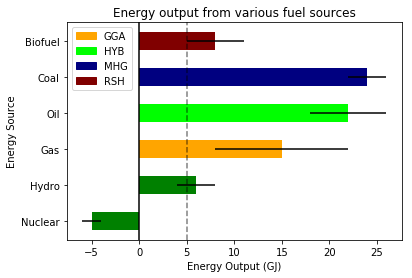

In [33]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [-5, 6, 15, 22, 24, 8]
variance = [1, 2, 7, 4, 2, 3]

x_pos = [i for i, _ in enumerate(x)]
print(x_pos)
x_pos=[0,0.5,1.0,1.5,2.0,2.5]
c=['g','g','orange','lime','navy','maroon']
w=[0.25,0.25,0.25,0.25,0.25,0.25]
plt.barh(x_pos, energy, color=c, xerr=variance,height=w)

# https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
orange_patch = mpatches.Patch(color='orange', label='GGA')
lime_patch = mpatches.Patch(color='lime', label='HYB')
navy_patch = mpatches.Patch(color='navy', label='MHG')
maroon_patch = mpatches.Patch(color='maroon', label='RSH')
plt.legend(handles=[orange_patch,lime_patch,navy_patch,maroon_patch])


plt.ylabel("Energy Source")
plt.xlabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.yticks(x_pos, x)
plt.axvline(x=0,color='black')
plt.axvline(x=5,color='black',linestyle='--',alpha=0.5)



plt.show()

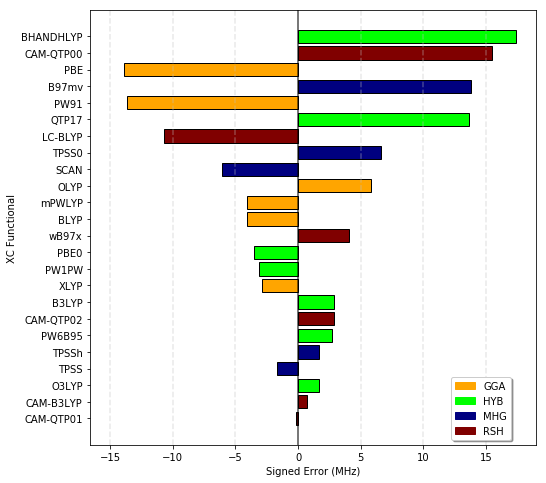

In [34]:
plt.figure(figsize=(8,8))
x=orderedXC
x_pos = [i for i, _ in enumerate(x)]
c=colors
plt.barh(x_pos, signedError, color=c,edgecolor='black')#,height=w)

plt.yticks(x_pos, x)


#manually add legend
## https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
orange_patch = mpatches.Patch(color='orange', label='GGA')
lime_patch = mpatches.Patch(color='lime', label='HYB')
navy_patch = mpatches.Patch(color='navy', label='MHG')
maroon_patch = mpatches.Patch(color='maroon', label='RSH')
plt.legend(handles=[orange_patch,lime_patch,navy_patch,maroon_patch],loc='lower right',bbox_to_anchor=(0.955, 0.00),
          fancybox=True, shadow=True)

plt.axvline(x=0,color='black',alpha=0.7)
plt.axvline(x=5,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=10,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=15,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=-5,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=-10,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=-15,color='silver',linestyle='--',alpha=0.35)


plt.ylabel("XC Functional")
plt.xlabel("Signed Error (MHz)")
plt.autoscale()
plt.savefig('signedError.eps', dpi = 1000,format='eps',bbox_inches = "tight",rasterized=True)
plt.show()

In [35]:
meanAbsErrorDict={'BLYP':[mad_blyp,abs(mad_blyp),'orange'], 'mPWLYP':[mad_mpwlyp,abs(mad_mpwlyp),'orange'], 'OLYP' : [mad_olyp,abs(mad_olyp),'orange'], 'PBE':[mad_pbe,abs(mad_pbe),'orange'],'PW91':[mad_pw91,abs(mad_pw91),'orange'],'XLYP':[mad_xlyp,abs(mad_xlyp),'orange'],  
              'B3LYP':[mad_b3lyp,abs(mad_b3lyp),'lime'], 'BHANDHLYP':[mad_bhandhlyp,abs(mad_bhandhlyp),'lime'],'O3LYP':[mad_o3lyp,abs(mad_o3lyp),'lime'],'PBE0':[mad_pbe0,abs(mad_pbe0),'lime'],'PW1PW':[mad_pw1pw,abs(mad_pw1pw),'lime'],'PW6B95':[mad_pw6b95,abs(mad_pw6b95),'lime'],'QTP17':[mad_qtp17,abs(mad_qtp17),'lime'],
              'TPSS0':[mad_tpss0,abs(mad_tpss0),'navy'],'TPSS':[mad_tpss,abs(mad_tpss),'navy'],'TPSSh':[mad_tpssh,abs(mad_tpssh),'navy'],'B97mv':[mad_b97mv,abs(mad_b97mv),'navy'],'SCAN':[mad_scan,abs(mad_scan),'navy'],
              'LC-BLYP':[mad_lcblyp,abs(mad_lcblyp),'maroon'],'CAM-B3LYP':[mad_camb3lyp,abs(mad_camb3lyp),'maroon'],'CAM-QTP00':[mad_qtp00,abs(mad_qtp00),'maroon'],'CAM-QTP01':[mad_qtp01,abs(mad_qtp01),'maroon'],'CAM-QTP02':[mad_qtp02,abs(mad_qtp02),'maroon'],'wB97x':[mad_wb97x,abs(mad_wb97x),'maroon']}

In [36]:
colors=[]
signedAbsError=[]
orderedXC=[]
for k in sorted(meanAbsErrorDict.values(), key=operator.itemgetter(1)): #sort based on absolute Mean Error
    print(k,get_key(k,meanAbsErrorDict),k[2])
    colors.append(k[2])
    signedAbsError.append(k[0])
    orderedXC.append(get_key(k,meanAbsErrorDict))

([11.543111320754713, 11.543111320754713, 'lime'], 'PBE0', 'lime')
([11.591447169811318, 11.591447169811318, 'lime'], 'PW1PW', 'lime')
([12.363737735849057, 12.363737735849057, 'lime'], 'PW6B95', 'lime')
([13.114603773584907, 13.114603773584907, 'navy'], 'TPSSh', 'navy')
([13.13869811320754, 13.13869811320754, 'maroon'], 'wB97x', 'maroon')
([13.152556603773583, 13.152556603773583, 'navy'], 'TPSS0', 'navy')
([13.241852830188673, 13.241852830188673, 'lime'], 'B3LYP', 'lime')
([13.645560377358484, 13.645560377358484, 'lime'], 'O3LYP', 'lime')
([13.892675471698116, 13.892675471698116, 'maroon'], 'CAM-B3LYP', 'maroon')
([14.388332075471705, 14.388332075471705, 'orange'], 'OLYP', 'orange')
([14.389488679245282, 14.389488679245282, 'maroon'], 'CAM-QTP02', 'maroon')
([14.460333962264148, 14.460333962264148, 'maroon'], 'CAM-QTP01', 'maroon')
([14.722396226415091, 14.722396226415091, 'navy'], 'TPSS', 'navy')
([17.185273584905662, 17.185273584905662, 'orange'], 'BLYP', 'orange')
([17.406086792452

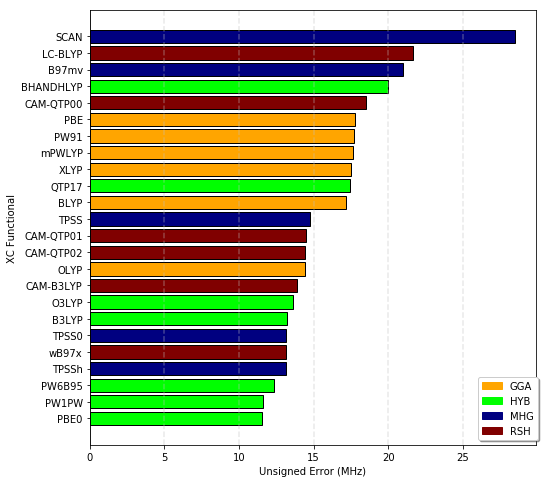

In [37]:
plt.figure(figsize=(8,8))
x=orderedXC
x_pos = [i for i, _ in enumerate(x)]
c=colors
plt.barh(x_pos, signedAbsError, color=c,edgecolor='black')#,height=w)

plt.yticks(x_pos, x)


#manually add legend
## https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
orange_patch = mpatches.Patch(color='orange', label='GGA')
lime_patch = mpatches.Patch(color='lime', label='HYB')
navy_patch = mpatches.Patch(color='navy', label='MHG')
maroon_patch = mpatches.Patch(color='maroon', label='RSH')
plt.legend(handles=[orange_patch,lime_patch,navy_patch,maroon_patch],loc='lower right',bbox_to_anchor=(1.015, 0.0),
          fancybox=True, shadow=True)

plt.axvline(x=0,color='black',alpha=0.7)
plt.axvline(x=5,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=10,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=15,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=20,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=25,color='silver',linestyle='--',alpha=0.35)



plt.ylabel("XC Functional")
plt.xlabel("Unsigned Error (MHz)")
plt.autoscale()
plt.savefig('signedAbsError.eps', dpi = 1000,format='eps',bbox_inches = "tight",rasterized=True)
plt.show()

In [38]:
rmsDict={'BLYP':[rms_blyp,abs(rms_blyp),'orange'], 'mPWLYP':[rms_mpwlyp,abs(rms_mpwlyp),'orange'], 'OLYP' : [rms_olyp,abs(rms_olyp),'orange'], 'PBE':[rms_pbe,abs(rms_pbe),'orange'],'PW91':[rms_pw91,abs(rms_pw91),'orange'],'XLYP':[rms_xlyp,abs(rms_xlyp),'orange'],  
              'B3LYP':[rms_b3lyp,abs(rms_b3lyp),'lime'], 'BHANDHLYP':[rms_bhandhblyp,abs(rms_bhandhblyp),'lime'],'O3LYP':[rms_o3lyp,abs(rms_o3lyp),'lime'],'PBE0':[rms_pbe0,abs(rms_pbe0),'lime'],'PW1PW':[rms_pw1pw,abs(rms_pw1pw),'lime'],'PW6B95':[rms_pw6b95,abs(rms_pw6b95),'lime'],'QTP17':[rms_qtp17,abs(rms_qtp17),'lime'],
              'TPSS0':[rms_tpss0,abs(rms_tpss0),'navy'],'TPSS':[rms_tpss,abs(rms_tpss),'navy'],'TPSSh':[rms_tpssh,abs(rms_tpssh),'navy'],'B97mv':[rms_b97mv,abs(rms_b97mv),'navy'],'SCAN':[rms_scan,abs(rms_scan),'navy'],
              'LC-BLYP':[rms_lcblyp,abs(rms_lcblyp),'maroon'],'CAM-B3LYP':[rms_camb3lyp,abs(rms_camb3lyp),'maroon'],'CAM-QTP00':[rms_qtp00,abs(rms_qtp00),'maroon'],'CAM-QTP01':[rms_qtp01,abs(rms_qtp01),'maroon'],'CAM-QTP02':[rms_qtp02,abs(rms_qtp02),'maroon'],'wB97x':[rms_wb97x,abs(rms_wb97x),'maroon']}

In [39]:
colors=[]
rmsError=[]
orderedXC=[]
for k in sorted(rmsDict.values(), key=operator.itemgetter(1)): #sort based on absolute Mean Error
    print(k,get_key(k,rmsDict),k[2])
    colors.append(k[2])
    rmsError.append(k[0])
    orderedXC.append(get_key(k,rmsDict))

([17.624615259710787, 17.624615259710787, 'navy'], 'TPSSh', 'navy')
([18.434923113799474, 18.434923113799474, 'maroon'], 'wB97x', 'maroon')
([18.67832549687896, 18.67832549687896, 'lime'], 'PW1PW', 'lime')
([18.90131534391191, 18.90131534391191, 'navy'], 'TPSS0', 'navy')
([20.13923371610466, 20.13923371610466, 'lime'], 'PBE0', 'lime')
([20.326505340128307, 20.326505340128307, 'navy'], 'TPSS', 'navy')
([21.431863453349507, 21.431863453349507, 'lime'], 'B3LYP', 'lime')
([21.58955028543573, 21.58955028543573, 'lime'], 'PW6B95', 'lime')
([22.307239954751644, 22.307239954751644, 'orange'], 'OLYP', 'orange')
([22.856782038800763, 22.856782038800763, 'lime'], 'O3LYP', 'lime')
([24.199074450404648, 24.199074450404648, 'maroon'], 'CAM-B3LYP', 'maroon')
([26.635983111144387, 26.635983111144387, 'maroon'], 'CAM-QTP01', 'maroon')
([27.914704250603823, 27.914704250603823, 'maroon'], 'CAM-QTP02', 'maroon')
([27.93137058970157, 27.93137058970157, 'navy'], 'B97mv', 'navy')
([28.382623248824572, 28.382

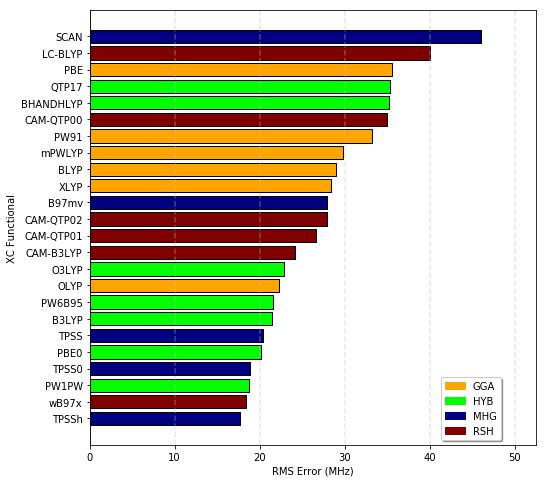

In [40]:
plt.figure(figsize=(8,8))
x=orderedXC
x_pos = [i for i, _ in enumerate(x)]
c=colors
plt.barh(x_pos, rmsError, color=c,edgecolor='black')#,height=w)

plt.yticks(x_pos, x)


#manually add legend
## https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
orange_patch = mpatches.Patch(color='orange', label='GGA')
lime_patch = mpatches.Patch(color='lime', label='HYB')
navy_patch = mpatches.Patch(color='navy', label='MHG')
maroon_patch = mpatches.Patch(color='maroon', label='RSH')
plt.legend(handles=[orange_patch,lime_patch,navy_patch,maroon_patch],loc='lower right',bbox_to_anchor=(0.932, 0.0),
          fancybox=True, shadow=True)

plt.axvline(x=0,color='black',alpha=0.7)
plt.axvline(x=10,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=20,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=30,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=40,color='silver',linestyle='--',alpha=0.35)
plt.axvline(x=50,color='silver',linestyle='--',alpha=0.35)



plt.ylabel("XC Functional")
plt.xlabel("RMS Error (MHz)")
plt.autoscale()
plt.savefig('rmsError.eps', dpi = 1000,format='eps',bbox_inches = "tight",rasterized=True)
plt.show()